In [1]:
# Must be included at the beginning of each new notebook. Remember to change the app name.
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('basics').getOrCreate()
import pandas
import matplotlib.pyplot as plt

In [2]:
df=spark.read.csv('death-rates-from-air-pollution1.csv', inferSchema=True, header=True)

In [3]:
df.show()

+-----------+----+----+------------------------------------------+-----------------------------------------+-----------------------------------------------+--------------------------------------------+
|     Entity|Code|Year|Air pollution (total) (deaths per 100,000)|Indoor air pollution (deaths per 100,000)|Outdoor particulate matter (deaths per 100,000)|Outdoor ozone pollution (deaths per 100,000)|
+-----------+----+----+------------------------------------------+-----------------------------------------+-----------------------------------------------+--------------------------------------------+
|Afghanistan| AFG|1990|                               299.4773089|                              250.3629097|                                    46.44658944|                                 5.616442031|
|Afghanistan| AFG|1991|                               291.2779667|                               242.575125|                                    46.03384057|                                 5.6

In [75]:
dfn=df.select('Entity','Year','Air pollution (total) (deaths per 100,000)')


In [76]:
dfn=dfn.withColumnRenamed('Air pollution (total) (deaths per 100,000)', 'DeathPollution')

In [77]:
dfn=dfn.withColumnRenamed('Entity', 'Country')

In [78]:
dfn.show()

+-----------+----+--------------+
|    Country|Year|DeathPollution|
+-----------+----+--------------+
|Afghanistan|1990|   299.4773089|
|Afghanistan|1991|   291.2779667|
|Afghanistan|1992|   278.9630556|
|Afghanistan|1993|   278.7908147|
|Afghanistan|1994|   287.1629232|
|Afghanistan|1995|   288.0142237|
|Afghanistan|1996|   286.6425885|
|Afghanistan|1997|   286.4474546|
|Afghanistan|1998|   286.2652019|
|Afghanistan|1999|   286.6360183|
|Afghanistan|2000|   283.7862708|
|Afghanistan|2001|   281.8835209|
|Afghanistan|2002|   273.3370933|
|Afghanistan|2003|   271.3029071|
|Afghanistan|2004|   269.1035306|
|Afghanistan|2005|   260.5358498|
|Afghanistan|2006|   255.1756174|
|Afghanistan|2007|   246.5212698|
|Afghanistan|2008|   237.5095919|
|Afghanistan|2009|   228.7571907|
+-----------+----+--------------+
only showing top 20 rows



In [79]:
from pyspark.sql.types import (StructField,StringType,IntegerType,StructType)
dataType=dfn.dtypes
Schema_dataType=StructType([StructField('Parameters',StringType())\
                           ,StructField('format',StringType())])
dataType=spark.createDataFrame(dataType,schema=Schema_dataType)
dataType.show()

+--------------+------+
|    Parameters|format|
+--------------+------+
|       Country|string|
|          Year|   int|
|DeathPollution|double|
+--------------+------+



In [122]:
dfp=dfn.groupBy('Country').sum('Year', 'DeathPollution')

In [123]:
dfp.show()

+--------------------+---------+-------------------+
|             Country|sum(Year)|sum(DeathPollution)|
+--------------------+---------+-------------------+
|          South Asia|    56098|  4504.216366199999|
|                Chad|    56098|       4998.9753443|
|            Paraguay|    56098| 1557.8998074100002|
|              Russia|    56098| 1850.5683165599999|
|Southeast Asia, E...|    56098| 3223.9838941800003|
|               World|    56098| 2442.2453337099996|
|               Yemen|    56098| 3739.7811034500005|
|             Senegal|    56098|       3356.0204132|
|              Sweden|    56098| 440.40059089900006|
|            Kiribati|    56098|  4890.796699999999|
|              Guyana|    56098|      2158.66127422|
|             Eritrea|    56098|  5171.493318099999|
|         Philippines|    56098|       3094.5377812|
|            Djibouti|    56098| 3192.2665841599996|
|High-income Asia ...|    56098|  558.2025814699999|
|               Tonga|    56098| 2558.81938560

In [124]:
dfp=dfp.filter( (dfp['sum(DeathPollution)'] > 3000) )

In [125]:
dfpp=dfp.toPandas()

No handles with labels found to put in legend.


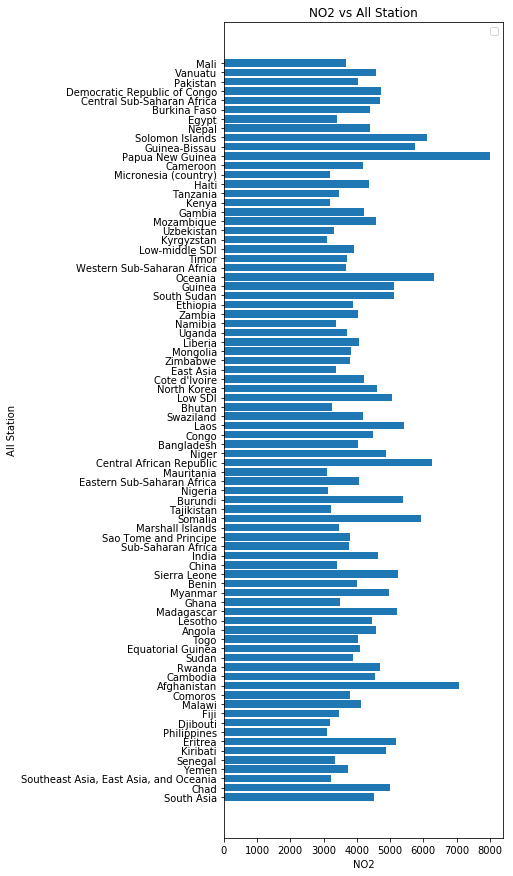

In [126]:
#Figure 1 countries death from 1990 to 2017
fig = plt.figure(figsize = (5, 15))
plt.barh(dfpp['Country'],dfpp['sum(DeathPollution)'])                                                                  
plt.show()

In [136]:
dfy=dfn.groupBy('Year','Country').mean('DeathPollution')

In [137]:
dfy.show()

+----+--------------------+-------------------+
|Year|             Country|avg(DeathPollution)|
+----+--------------------+-------------------+
|1994|             Albania|        73.23275142|
|2005|             Armenia|        86.60722261|
|1998|               Benin|        156.3191308|
|2001|             Burundi|        203.1909443|
|2015|            Cameroon|        122.5088857|
|1993|Central Europe, E...|        87.20803999|
|2000|         High-income|        26.76548109|
|2004|               India|        151.5715029|
|2006|                Laos|        178.3055161|
|1991|             Lebanon|        72.56866539|
|2008|           Mauritius|        57.06223053|
|2008|           Nicaragua|        47.26121253|
|1994|Northern Mariana ...|        50.93020802|
|2002|            Portugal|        30.15914976|
|2008|            Portugal|        22.99478251|
|2012|            Portugal|        18.86712943|
|1996|             Romania|        86.94458279|
|2000|              Russia|        75.16

In [139]:
dfyp=dfy.toPandas()

In [144]:
#choosing the china 
dfc=dfy[dfy.Country=='China'].show().ordered('Year')

+----+-------+-------------------+
|Year|Country|avg(DeathPollution)|
+----+-------+-------------------+
|1992|  China|        177.2834672|
|2005|  China|        111.3419029|
|1997|  China|        149.6834218|
|2012|  China|        85.77144184|
|1999|  China|        138.2017334|
|1990|  China|        184.4132044|
|1998|  China|        144.8416199|
|1996|  China|        155.3857949|
|2002|  China|        124.9978735|
|2007|  China|        97.83587858|
|2000|  China|        133.1366852|
|2001|  China|        128.0940057|
|2008|  China|         95.4391289|
|2003|  China|        122.3120249|
|1994|  China|        167.0829393|
|2013|  China|        81.73468623|
|2010|  China|        92.97014294|
|2011|  China|         90.6548837|
|2016|  China|        74.70570935|
|1991|  China|        181.8007043|
+----+-------+-------------------+
only showing top 20 rows



AttributeError: 'NoneType' object has no attribute 'ordered'

In [ ]:
dfyp[dfyp.Country=='China']

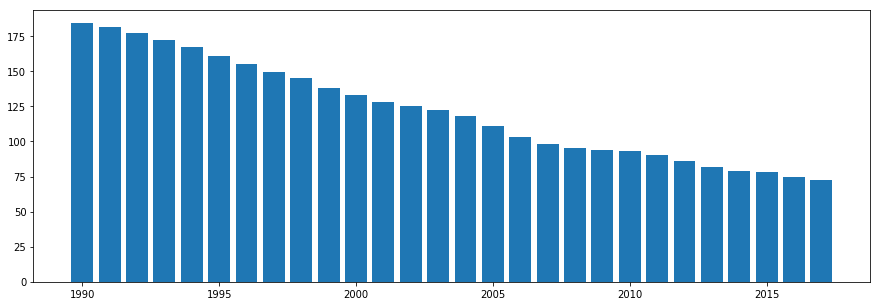

In [142]:
# #Figure 3 china death from 1990 to 2017
fig = plt.figure(figsize = (15,5))
plt.bar(dfc['Year'],dfc['avg(DeathPollution)'])                                                                  
plt.show()

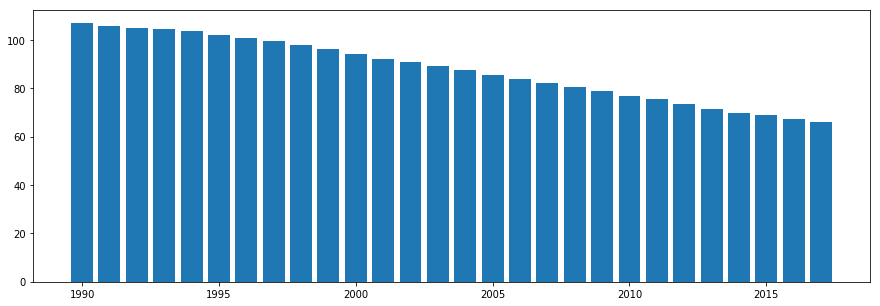

In [134]:
#Figure 2 countries death from 1990 to 2017
fig = plt.figure(figsize = (15,5))
plt.bar(dfyp['Year'],dfyp['avg(DeathPollution)'])                                                                  
plt.show()